In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../data/train.csv')
df_test = pd.read_csv('../data/test.csv')

In [3]:
df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [4]:
df.shape

(2051, 81)

In [5]:
df.isnull().sum().head(42)

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       330
Lot Area             0
Street               0
Alley             1911
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        22
Mas Vnr Area        22
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           55
Bsmt Cond           55
Bsmt Exposure       58
BsmtFin Type 1      55
BsmtFin SF 1         1
BsmtFin Type 2      56
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Heating              0
Heating QC           0
dtype: int64

In [6]:
df.isnull().sum().tail(40)

Heating QC            0
Central Air           0
Electrical            0
1st Flr SF            0
2nd Flr SF            0
Low Qual Fin SF       0
Gr Liv Area           0
Bsmt Full Bath        2
Bsmt Half Bath        2
Full Bath             0
Half Bath             0
Bedroom AbvGr         0
Kitchen AbvGr         0
Kitchen Qual          0
TotRms AbvGrd         0
Functional            0
Fireplaces            0
Fireplace Qu       1000
Garage Type         113
Garage Yr Blt       114
Garage Finish       114
Garage Cars           1
Garage Area           1
Garage Qual         114
Garage Cond         114
Paved Drive           0
Wood Deck SF          0
Open Porch SF         0
Enclosed Porch        0
3Ssn Porch            0
Screen Porch          0
Pool Area             0
Pool QC            2042
Fence              1651
Misc Feature       1986
Misc Val              0
Mo Sold               0
Yr Sold               0
Sale Type             0
SalePrice             0
dtype: int64

In [7]:
df.dtypes.head(45)

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
Foundation         object
Bsmt Qual          object
Bsmt Cond          object
Bsmt Exposure      object
BsmtFin Type 1     object
BsmtFin SF 1      float64
BsmtFin Type 2     object
BsmtFin SF 2      float64
Bsmt Unf SF 

In [8]:
# remove two outliers found in very large homes
df = df[df['Gr Liv Area'] < 4000]

In [9]:
#remove nulls from two columns
df.dropna(subset=['BsmtFin SF 1', 'Total Bsmt SF', 'Garage Cars'], inplace=True)

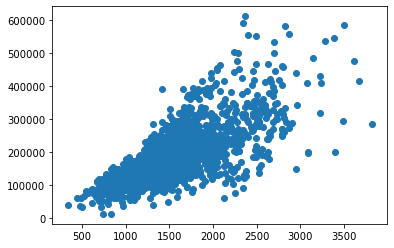

In [10]:
plt.scatter(df['Gr Liv Area'], df['SalePrice']);

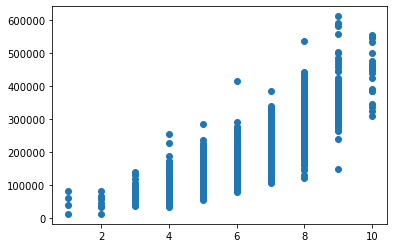

In [11]:
plt.scatter(df['Overall Qual'], df['SalePrice']);

In [12]:
df['Central Air'] = df['Central Air'].map({'Y': 1, 'N': 0})

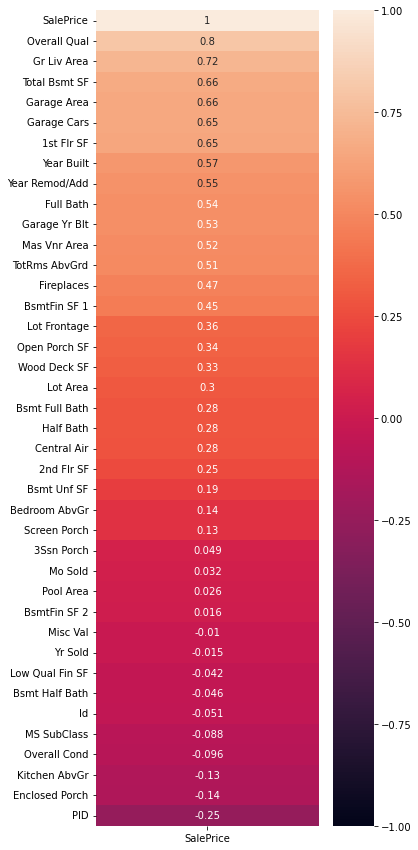

In [13]:
# taken almost directly from Katie Sylvia's lecture

plt.figure(figsize=(5,15))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False),
            annot=True,
            vmin=-1,
            vmax=1);

In [14]:
#df.to_csv('../data/roman_df.csv', index=False)

In [15]:
df.groupby(['Bldg Type']).mean()['Gr Liv Area']

Bldg Type
1Fam      1513.879127
2fmCon    1462.456522
Duplex    1607.093333
Twnhs     1229.536232
TwnhsE    1375.670807
Name: Gr Liv Area, dtype: float64

In [16]:
#df_test['SalePrice'] = 0

In [17]:
newdf = pd.concat([df, df_test])

In [18]:
newdf = pd.get_dummies(newdf, columns=['Bldg Type'], drop_first=True)

In [19]:
df = newdf[:2047]

In [20]:
df_test = newdf[2047:]
df_test.drop(columns=['SalePrice'], inplace=True)

C:\Users\roman\AppData\Local\Temp\ipykernel_14016\2786479985.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(columns=['SalePrice'], inplace=True)


In [21]:
df.to_csv('../data/roman_df.csv', index=False)
df_test.to_csv('../data/roman_df_test.csv', index=False)

In [24]:
df.isnull().sum().head(60)

Id                    0
PID                   0
MS SubClass           0
MS Zoning             0
Lot Frontage        330
Lot Area              0
Street                0
Alley              1907
Lot Shape             0
Land Contour          0
Utilities             0
Lot Config            0
Land Slope            0
Neighborhood          0
Condition 1           0
Condition 2           0
House Style           0
Overall Qual          0
Overall Cond          0
Year Built            0
Year Remod/Add        0
Roof Style            0
Roof Matl             0
Exterior 1st          0
Exterior 2nd          0
Mas Vnr Type         22
Mas Vnr Area         22
Exter Qual            0
Exter Cond            0
Foundation            0
Bsmt Qual            54
Bsmt Cond            54
Bsmt Exposure        57
BsmtFin Type 1       54
BsmtFin SF 1          0
BsmtFin Type 2       55
BsmtFin SF 2          0
Bsmt Unf SF           0
Total Bsmt SF         0
Heating               0
Heating QC            0
Central Air     